In [32]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [33]:
# Read the sales data
file_path = Path("Resources/store_data.csv")
df = pd.read_csv(file_path)

# Display sample data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price,Price without discount,Unit Cost
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0%,41.9136,130.9800,130.98,20.9568
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0%,219.5820,243.9800,243.98,73.1940
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0%,6.8714,7.3100,7.31,3.4357
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45%,-383.0310,191.5155,348.21,80.0883
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20%,2.5164,11.1840,13.98,4.0542


In [34]:
# Split target column from dataset
y = df['Sales']
X = df.drop(['Sales'], axis=1)

In [35]:
# Preview the data
X[:5]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Unit Price,Price without discount,Unit Cost
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,0%,41.9136,130.9800,130.98,20.9568
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0%,219.5820,243.9800,243.98,73.1940
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,0%,6.8714,7.3100,7.31,3.4357
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,45%,-383.0310,191.5155,348.21,80.0883
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,20%,2.5164,11.1840,13.98,4.0542


In [36]:
# Print first five entries for target
y[:5]

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [37]:
#Convert non-numeric values to categorical ones using preprocessing and label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing

X1 = X.select_dtypes('O')

for col in X1.columns:
    lab = preprocessing.LabelEncoder()
    X[col] = lab.fit_transform(X1[col].values)
X


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Unit Price,Price without discount,Unit Cost
0,1,2500,304,219,2,143,166,0,0,194,...,12,0,4,386,2,0,41.9136,130.9800,130.98,20.9568
1,2,2500,304,219,2,143,166,0,0,194,...,55,0,5,839,3,0,219.5820,243.9800,243.98,73.1940
2,3,2296,835,906,2,237,201,1,0,266,...,946,1,10,1433,2,0,6.8714,7.3100,7.31,3.4357
3,4,4372,93,128,3,705,687,0,0,153,...,319,0,16,366,5,7,-383.0310,191.5155,348.21,80.0883
4,5,4372,93,128,3,705,687,0,0,153,...,1316,1,14,573,2,3,2.5164,11.1840,13.98,4.0542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,138,31,43,2,737,758,0,0,295,...,200,0,9,1586,3,3,4.1028,8.4160,10.52,3.4716
9990,9991,3216,476,620,3,190,202,0,0,104,...,164,0,9,1535,2,0,15.6332,45.9800,45.98,7.8166
9991,9992,3216,476,620,3,190,202,0,0,104,...,1816,2,13,47,2,3,19.3932,129.2880,161.61,42.0186
9992,9993,3216,476,620,3,190,202,0,0,104,...,1247,1,12,929,4,0,13.3200,7.4000,7.40,3.3300


In [38]:
# Split the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [39]:
X_train.shape

(7495, 23)

In [40]:
X_test.shape

(2499, 23)

In [41]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [42]:
# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=150,max_depth=7,random_state=5)

In [43]:
# Fitting the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, random_state=5)

In [44]:
#Compute and return the scores from the model
print("Random Forest Regressor")
print(rf_regressor.score(X_train, y_train))
print(rf_regressor.score(X_test, y_test))

Random Forest Regressor
0.981959159534934
0.8732665632839516


In [45]:
#Run feature analysis
rf_regressor.feature_importances_

array([2.13567906e-03, 1.70919685e-03, 1.68275883e-03, 1.15754579e-03,
       1.41040077e-03, 2.61467792e-03, 3.66533801e-03, 2.00881954e-03,
       0.00000000e+00, 1.99311001e-03, 3.45423829e-03, 2.06216300e-03,
       6.17950138e-04, 2.83341470e-03, 6.03759003e-05, 4.18741505e-04,
       5.91615899e-04, 1.07224046e-01, 1.94196331e-03, 6.89326035e-02,
       7.47449574e-01, 2.48543771e-02, 2.11814095e-02])

In [47]:
#Match feature importance with the respective category and put into a dataframe
importances_df = pd.DataFrame(sorted(zip(rf_regressor.feature_importances_, X.columns), reverse=True))
importances_df

,0,1
0,0.747450,Unit Price
1,0.107224,Quantity
2,0.068933,Profit
3,0.024854,Price without discount
4,0.021181,Unit Cost
5,0.003665,Customer Name
6,0.003454,State
7,0.002833,Product ID
8,0.002615,Customer ID
9,0.002136,Row ID


Random Forest Regressor
Train Score: 0.981959159534934
Test Score: 0.8732665632839516
Reg_score: 0.8732665632839516
Mean Squared Error: 52163.10012893365
Mean absolute percentage error: 0.34503421371970183
Mean absolute error: 30.214216048755794
rmse: 228.39242572584067


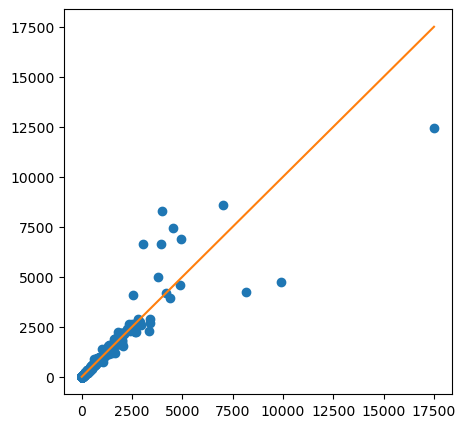

In [50]:
#Run predictions
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
mape = mean_absolute_percentage_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
reg_score = r2_score(y_test, y_pred)
print("Random Forest Regressor")
print("Train Score:", rf_regressor.score(X_train, y_train))
print("Test Score:", rf_regressor.score(X_test, y_test))
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)

#Plot the results
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()